In [206]:
import pandas as pd
import numpy as np

In [207]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from matplotlib import pyplot

In [208]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [209]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [210]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [211]:
corr=df.corr()
corr["target"].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [212]:
x=df.drop(["target"],axis=1)
y=df["target"]

In [213]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=42,shuffle=True) 

In [214]:
dt=DecisionTreeClassifier()
clf=dt.fit(x_train,y_train)
clf.score(x_train,y_train),clf.score(x_test,y_test)

(1.0, 0.7252747252747253)

In [326]:
rf = RandomForestClassifier()
clf1=rf.fit(x_train,y_train)
clf1.score(x_train,y_train),clf1.score(x_test,y_test)

(1.0, 0.8351648351648352)

In [328]:
lr = LogisticRegression()
clf2=lr.fit(x_train,y_train)
clf2.score(x_train,y_train),clf2.score(x_test,y_test)

C:\Users\ASUS\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8679245283018868, 0.8131868131868132)

In [330]:
sv= svm.SVC()
clf3=sv.fit(x_train,y_train)
clf3.score(x_train,y_train),clf3.score(x_test,y_test)

(0.660377358490566, 0.7032967032967034)

In [331]:
knn = KNeighborsClassifier()
clf4=knn.fit(x_train,y_train)
clf4.score(x_train,y_train),clf4.score(x_test,y_test)

(0.7688679245283019, 0.6593406593406593)

In [219]:
parameters = { 
    'max_leaf_nodes': list(range(2, 100)), 
    'min_samples_split': [2, 3, 4],
    'criterion' :['gini', 'entropy'],
    #'n_jobs':[-1],
    'max_features': ['auto', 'sqrt']
}

#Fitting the trainingset to find parameters with best accuracy

CV_dt = GridSearchCV(estimator=dt, param_grid=parameters, cv= 4)
CV_dt.fit(x_train, y_train)

#Getting the outcome of gridsearch

CV_dt.best_params_

KeyboardInterrupt: 

In [70]:
#Building a dictionalry with list of optional values that will me analyesed by GridSearch CV

parameters = { 
    'n_estimators': [100,150, 200,250],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,5,6,7],
    'criterion' :['gini', 'entropy'],
    'n_jobs':[-1,None]
}

#Fitting the trainingset to find parameters with best accuracy

CV_rf = GridSearchCV(estimator=rf, param_grid=parameters, cv= 4)
CV_rf.fit(x_train, y_train)

#Getting the outcome of gridsearch

CV_rf.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 100,
 'n_jobs': None}

In [151]:
parameters = { 
                'penalty' : ['l1', 'l2'],
                'C': [0.01, 0.1, 1, 10]
}

#Fitting the trainingset to find parameters with best accuracy

CV_lr = GridSearchCV(estimator=lr, param_grid=parameters)
CV_lr.fit(x_train, y_train)

#Getting the outcome of gridsearch

CV_lr.best_params_

C:\Users\ASUS\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ASUS\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ASUS\anaconda3\e

{'C': 0.1, 'penalty': 'l2'}

In [121]:
parameters = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}

#Fitting the trainingset to find parameters with best accuracy

CV_svm = GridSearchCV(estimator=svm, param_grid=parameters)
CV_svm.fit(x_train, y_train)

#Getting the outcome of gridsearch

CV_svm.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [ ]:
parameters = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}

#Fitting the trainingset to find parameters with best accuracy

CV_svm = GridSearchCV(estimator=svm, param_grid=parameters)
CV_svm.fit(x_train, y_train)

#Getting the outcome of gridsearch

CV_svm.best_params_

In [140]:
parameters = {'n_neighbors': [3, 5, 7, 9, 11,13]}

#Fitting the trainingset to find parameters with best accuracy

CV_knn = GridSearchCV(estimator=knn, param_grid=parameters)
CV_knn.fit(x_train, y_train)

#Getting the outcome of gridsearch

CV_knn.best_params_

{'n_neighbors': 9}

In [220]:
dt=DecisionTreeClassifier(criterion= 'gini', max_features= 'sqrt', max_leaf_nodes=29,  min_samples_split= 3)
clf=dt.fit(x_train,y_train)
clf.score(x_train,y_train),clf.score(x_test,y_test)

(0.9150943396226415, 0.8021978021978022)

In [221]:
cv_dt=cross_val_score(clf,x_train,y_train,scoring='accuracy',cv=5)
print(cv_dt)
np.mean(cv_dt)

[0.76744186 0.79069767 0.54761905 0.85714286 0.78571429]


0.7497231450719822

In [335]:
rf = RandomForestClassifier(criterion= "gini",max_depth= 4,max_features="sqrt",n_estimators=100)
clf1=rf.fit(x_train,y_train)
clf1.score(x_train,y_train),clf1.score(x_test,y_test)

(0.9198113207547169, 0.8461538461538461)

In [223]:
cv_rf=cross_val_score(clf1,x_train,y_train,scoring='accuracy',cv=5)
print(cv_rf)
np.mean(cv_rf)

[0.88372093 0.86046512 0.73809524 0.9047619  0.76190476]


0.8297895902547066

In [224]:
lr = LogisticRegression(C= 0.1, penalty='l2')
clf2=rf.fit(x_train,y_train)
clf2.score(x_train,y_train),clf2.score(x_test,y_test)

(0.9339622641509434, 0.8571428571428571)

In [225]:
cv_lr=cross_val_score(clf2,x_train,y_train,scoring='accuracy',cv=5)
print(cv_lr)
np.mean(cv_lr)

[0.86046512 0.8372093  0.76190476 0.92857143 0.78571429]


0.8347729789590254

In [337]:
sv = svm.SVC(C=1000, gamma=0.0001, kernel='rbf')
clf3=rf.fit(x_train,y_train)
clf3.score(x_train,y_train),clf3.score(x_test,y_test)

(0.9292452830188679, 0.8461538461538461)

In [227]:
cv_svm=cross_val_score(clf3,x_train,y_train,scoring='accuracy',cv=5)
print(cv_svm)
np.mean(cv_svm)

[0.86046512 0.86046512 0.73809524 0.88095238 0.76190476]


0.820376522702104

In [228]:
knn = KNeighborsClassifier(n_neighbors= 9)
clf4=knn.fit(x_train,y_train)
clf4.score(x_train,y_train),clf4.score(x_test,y_test)

(0.7216981132075472, 0.6593406593406593)

In [229]:
cv_knn=cross_val_score(clf4,x_train,y_train,scoring='accuracy',cv=5)
print(cv_knn)
np.mean(cv_knn)

[0.69767442 0.74418605 0.5952381  0.64285714 0.69047619]


0.6740863787375415

highest mean cv on rf.

In [339]:
def get_stacking():
    # define the base models
    level0 = list()
    #level0.append(clf)
    level0.append(clf1)
    level0.append(clf2)
    level0.append(clf3)
    #level0.append(clf4)
    # define meta learner model
    #level1 = clf1
    # define the stacking ensemble,
    model = StackingClassifier(estimators=level0, cv=5)
    return model
 

In [340]:
def get_models():
	models = dict()
	#models['DT'] = clf
	models['RF'] = clf1
	models['LR'] = clf2
	models['SVM'] = clf3
	#models['KNN'] = clf4
	return models

In [341]:
models = get_models()

In [342]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [343]:
def evaluate_model(model, x_train, y_train):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

>RF 0.827 (0.073)
>LR 0.827 (0.077)
>SVM 0.825 (0.070)


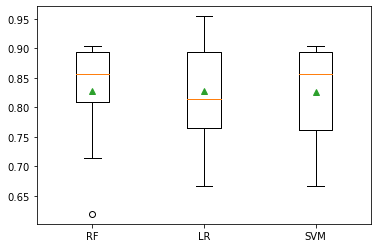

In [344]:
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, x_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [345]:
clf_final=model.fit(x_train,y_train)

In [362]:
clf_final.score(x_train,y_train),clf_final.score(x_test,y_test)

(0.9150943396226415, 0.8351648351648352)

In [363]:
clf1.score(x_train,y_train),clf1.score(x_test,y_test)

(0.9150943396226415, 0.8351648351648352)

In [366]:
test1=[42,1,1,120,295,0,1,162,0,0,2,0,2]

In [367]:
import numpy as np
test1 = np.array(test1).reshape(1, len(test1))


In [368]:
clf1.predict(test1)

array([1], dtype=int64)

In [369]:
clf_final.predict(test1)

array([1], dtype=int64)

In [321]:
import pickle

In [364]:
filename = 'HA_model_final.sav'
pickle.dump(clf_final, open(filename, 'wb'))

In [365]:
filename="h1.sav"
pickle.dump(clf1, open(filename, 'wb'))